
# R interface to Keras

Keras is a high-level neural networks API developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. Keras has the following key features:

* Allows the same code to run on CPU or on GPU, seamlessly.

* User-friendly API which makes it easy to quickly prototype deep learning models.

* Built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.

* Supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, etc. This means that Keras is appropriate for building essentially any deep learning model, from a memory network to a neural Turing machine.

* Is capable of running on top of multiple back-ends including TensorFlow, CNTK, or Theano.

* For additional details on why you might consider using Keras for your deep learning projects, see the Why Use Keras? article.

* This website provides documentation for the R interface to Keras. See the main Keras website at https://keras.io for additional information on the project.



First, install the keras R package from CRAN as follows:



In [1]:
library(tensorflow)
library(keras)
library(magrittr)
library(dplyr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Learning Keras
Below we walk through a simple example of using Keras to recognize handwritten digits from the MNIST dataset. After getting familiar with the basics, check out the tutorials and additional learning resources available on this website.

The Deep Learning with R book by François Chollet (the creator of Keras) provides a more comprehensive introduction to both Keras and the concepts and practice of deep learning.

You may also find it convenient to download the Deep Learning with Keras cheat sheet, a quick high-level reference to all of the capabilities of Keras.



## A) A Basic MNIST Example

We can learn the basics of Keras by walking through a simple example: recognizing handwritten digits from the MNIST dataset. MNIST consists of 28 x 28 grayscale images of handwritten digits like these:

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png  "Title")

Preparing the Data
The MNIST dataset is included with Keras and can be accessed using the dataset_mnist() function. Here we load the dataset then create variables for our test and training data:

In [2]:
library(keras)
mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

The x data is a 3-d array (images,width,height) of grayscale values . To prepare the data for training we convert the 3-d arrays into matrices by reshaping width and height into a single dimension (28x28 images are flattened into length 784 vectors). Then, we convert the grayscale values from integers ranging between 0 to 255 into floating point values ranging between 0 and 1:



In [3]:
# reshape
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
# rescale
x_train <- x_train / 255
x_test <- x_test / 255

Note that we use the array_reshape() function rather than the dim<-() function to reshape the array. This is so that the data is re-interpreted using row-major semantics (as opposed to R’s default column-major semantics), which is in turn compatible with the way that the numerical libraries called by Keras interpret array dimensions.

The y data is an integer vector with values ranging from 0 to 9. To prepare this data for training we one-hot encode the vectors into binary class matrices using the Keras to_categorical() function:



In [4]:
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

In [5]:
y_train

0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0


## Defining the Model 

The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers.

We begin by creating a sequential model and then adding layers using the pipe (%>%) operator:



In [6]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax')

In [7]:
summary(model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 256)                     200960      
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 10)                      1290        
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_____________________________________

Next, compile the model with appropriate loss function, optimizer, and metrics:



In [8]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

Training and Evaluation

Use the fit() function to train the model for 30 epochs using batches of 128 images:

In [9]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2, verbose =2
)

The history object returned by fit() includes loss and accuracy metrics which we can plot:

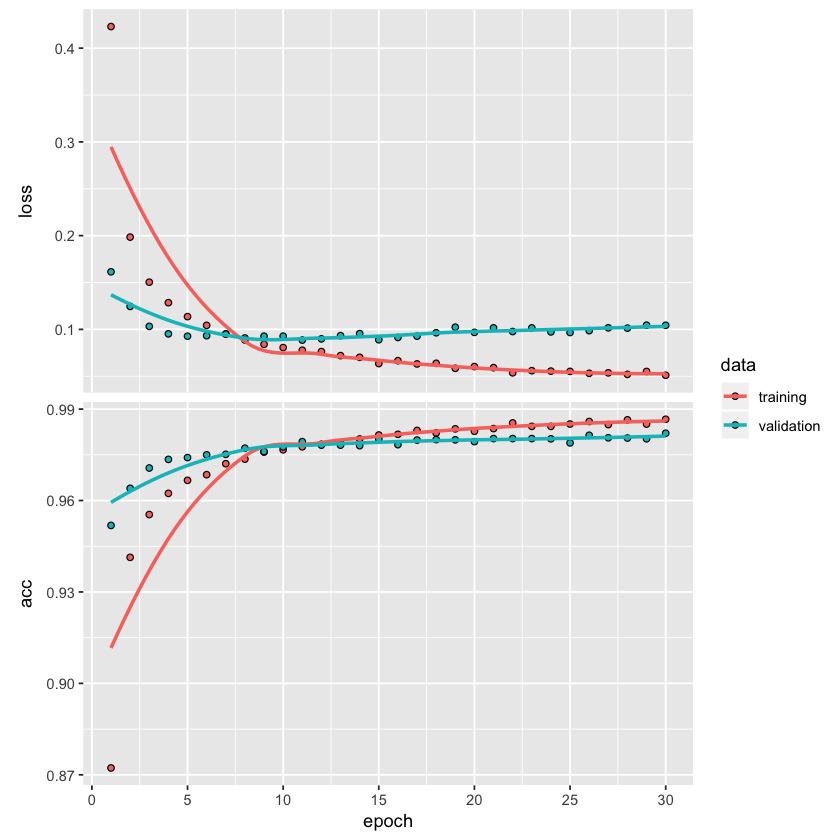

In [10]:
plot(history)

Evaluate the model’s performance on the test data:

In [11]:
model %>% evaluate(x_test, y_test)

$loss
[1] 0.1087391

$acc
[1] 0.9803

Generate predictions on new data:

In [12]:
model %>% predict_classes(x_test)

[1] 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2
   [37] 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0
   [73] 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1
  [109] 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1
  [145] 7 1 8 2 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8
  [181] 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0
  [217] 3 6 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 2 4 2 4 1
  [253] 9 5 7 7 2 8 2 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4
  [289] 1 5 8 2 9 2 0 4 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 8 7 9 3
  [325] 0 4 2 0 7 1 1 2 1 5 3 3 9 7 8 6 3 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 4
  [361] 4 6 2 2 5 0 6 5 6 3 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5
  [397] 2 5 4 4 2 8 3 8 2 4 5 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8
  [433] 4 5 9 8 8 3 7 6 0 0 3 0 2 0 6 9 9 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2
  [469] 7 5 8 9 6 1 8 4 1 2 5 9 1 9 7 5 4 0 8 9 9 1 0 5 2 3 7 0 9 4 0 6 3 9 5 2
  [505] 1 3 1 3 6 5 7 4 2 2 6 3 2 6 5 4 8 9 7 1 3 0 3 8 3 1 9 3 4 4 6 4 2 1 8 2
  [541] 5 4 8 8 4 0 0 2 3 2 7 7 0 8 7 4 4 7 9 6 9 0 9 8 0 4 6 0 6 3 5 4 8 3 3 9
  [577] 3 3 3 7 8 0 2 2 1 7 0 6 5 4 3 8 0 9 6 3 8 0 9 9 6 8 6 8 5 7 8 6 0 2 4 0
  [613] 2 2 3 1 9 7 5 8 0 8 4 6 2 6 7 9 3 2 9 8 2 2 9 2 7 3 5 9 1 8 0 2 0 5 2 1
  [649] 3 7 6 7 1 2 5 8 0 3 7 1 4 0 9 1 8 6 7 7 4 3 4 9 1 9 5 1 7 3 9 7 6 9 1 3
  [685] 3 8 3 3 6 7 2 4 5 8 5 1 1 4 4 3 1 0 7 7 0 7 9 9 4 8 5 5 4 0 8 2 1 0 8 4
  [721] 8 0 4 0 6 1 7 3 2 6 7 2 6 9 3 1 4 6 2 5 4 2 0 6 2 1 7 3 4 1 0 5 4 3 1 1
  [757] 7 4 9 9 4 8 4 0 2 4 5 1 1 6 4 7 1 9 4 2 4 1 5 5 3 8 3 1 4 5 6 8 9 4 1 5
  [793] 3 8 0 3 2 5 1 2 8 3 4 4 0 8 8 3 3 1 7 3 5 9 6 3 2 6 1 3 6 0 7 2 1 7 1 4
  [829] 2 4 2 1 7 9 6 1 1 2 4 8 1 7 7 4 8 0 7 3 1 3 1 0 7 7 0 3 5 5 2 7 6 6 9 2
  [865] 8 3 5 2 2 5 6 0 8 2 9 2 8 8 8 8 7 4 4 3 0 6 6 3 2 1 3 2 2 9 3 0 0 5 7 8
  [901] 3 4 4 6 0 2 9 1 4 7 4 7 3 9 8 8 4 7 1 2 1 2 2 3 2 3 2 3 9 1 7 4 0 3 5 5
  [937] 8 6 3 2 6 7 6 6 3 2 7 9 1 1 7 4 6 4 9 5 2 3 3 4 7 8 9 1 1 0 9 1 4 4 5 4
  [973] 0 6 2 2 3 1 5 1 2 0 3 8 1 2 6 7 1 6 2 3 9 0 1 2 2 0 8 9 9 0 2 5 1 9 7 8
 [1009] 1 0 4 1 7 9 5 4 2 6 8 1 3 7 5 4 4 1 8 1 3 8 1 2 5 8 0 6 2 1 1 2 1 5 3 4
 [1045] 6 9 5 0 9 2 2 4 8 2 1 7 2 4 9 4 4 0 3 9 2 2 3 3 8 3 5 7 3 5 8 1 2 4 4 6
 [1081] 4 9 5 1 0 6 9 5 9 5 9 7 3 8 0 3 7 1 3 6 7 2 5 9 7 9 6 5 6 3 7 4 6 5 3 5
 [1117] 4 7 8 7 8 0 7 6 8 8 7 3 3 1 9 5 2 7 3 5 1 1 2 1 4 7 4 7 5 4 5 4 0 8 3 6
 [1153] 9 6 0 2 8 4 4 4 4 6 6 4 7 9 3 4 5 5 8 7 3 7 2 7 0 2 4 1 1 1 5 9 2 8 7 2
 [1189] 0 1 5 0 4 1 7 0 6 0 8 6 8 1 8 0 3 3 7 2 3 6 2 1 6 1 1 3 7 9 0 8 0 5 4 0
 [1225] 2 8 2 2 9 8 4 0 4 5 8 5 1 2 1 3 1 7 4 5 7 2 0 5 8 8 6 2 5 4 1 9 2 1 5 8
 [1261] 7 0 2 4 4 3 6 8 8 2 4 0 5 0 4 4 7 9 3 4 1 5 9 7 3 5 8 8 0 5 3 3 6 6 0 1
 [1297] 6 0 3 5 4 4 1 2 9 1 4 6 9 9 3 9 8 4 4 3 1 3 1 3 8 7 9 4 8 8 7 9 7 1 4 5
 [1333] 6 0 5 2 2 2 1 5 5 2 4 9 6 2 7 7 2 2 1 1 2 8 3 7 2 4 1 7 1 7 6 7 8 2 7 3
 [1369] 1 7 5 8 2 6 2 2 5 6 5 0 9 2 4 3 3 9 7 6 6 8 0 4 1 3 8 2 9 1 8 0 6 7 2 1
 [1405] 0 5 5 2 0 2 2 0 2 4 9 8 0 9 9 4 6 5 4 9 1 8 3 4 9 9 1 2 2 8 1 9 6 4 0 9
 [1441] 4 8 3 8 6 0 2 5 1 9 6 2 9 4 0 9 6 0 6 2 5 4 2 3 8 4 5 5 0 3 8 5 3 5 8 6
 [1477] 5 7 6 3 3 9 6 1 1 2 9 0 4 3 3 6 9 5 7 3 7 7 7 8 7 9 8 3 0 7 2 7 9 4 5 4
 [1513] 9 3 2 1 4 0 2 3 7 5 9 8 8 5 0 3 1 4 7 3 9 0 0 0 6 6 2 3 7 8 4 7 7 9 2 4
 [1549] 1 6 5 2 4 3 9 1 8 4 0 9 8 4 8 7 7 0 7 8 8 6 0 4 8 8 2 4 7 6 6 6 4 7 1 8
 [1585] 8 2 3 6 3 0 0 3 7 6 9 7 9 9 5 4 3 3 6 1 2 3 7 3 3 2 0 3 3 8 4 3 6 3 5 0
 [1621] 2 0 9 0 7 4 6 9 3 5 1 9 6 1 4 5 4 5 0 5 9 5 2 1 2 9 1 9 9 4 0 8 4 5 2 9
 [1657] 2 1 2 1 7 3 6 8 8 4 9 1 9 8 5 7 5 1 1 8 6 5 2 4 4 7 2 3 5 6 8 8 6 2 3 1
 [1693] 0 5 8 9 2 9 6 7 0 4 8 7 1 7 4 1 0 3 7 2 0 0 9 1 7 0 7 8 4 7 2 0 4 6 0 3
 [1729] 1 1 3 3 9 6 7 4 1 5 3 0 8 7 3 9 6 9 3 5 0 2 7 2 5 1 7 5 8 0 8 8 1 5 0 3
 [1765] 0 3 1 4 0 3 7 2 7 1 8 0 7 0 4 3 1 9 8 7 7 1 4 9 9 3 7 1 7 9 0 2 0 3 3 7
 [18

# B) Trains a simple convnet on the MNIST dataset.

https://github.com/rstudio/keras/blob/master/vignettes/examples/mnist_cnn.R

Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs Note: There is still a large margin for parameter tuning

16 seconds per epoch on a GRID K520 GPU.

In [13]:
library(keras)

# Data Preparation -----------------------------------------------------

batch_size <- 128
num_classes <- 10
epochs <- 12

# Input image dimensions
img_rows <- 28
img_cols <- 28

# The data, shuffled and split between train and test sets
mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

# Redefine  dimension of train/test inputs
x_train <- array_reshape(x_train, c(nrow(x_train), img_rows, img_cols, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), img_rows, img_cols, 1))
input_shape <- c(img_rows, img_cols, 1)

# Transform RGB values into [0,1] range
x_train <- x_train / 255
x_test <- x_test / 255

cat('x_train_shape:', dim(x_train), '\n')
cat(nrow(x_train), 'train samples\n')
cat(nrow(x_test), 'test samples\n')

# Convert class vectors to binary class matrices
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)

# Define Model -----------------------------------------------------------

# Define model
model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',
                input_shape = input_shape) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>% 
  layer_dense(units = 128, activation = 'relu') %>% 
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = num_classes, activation = 'softmax')

# Compile model
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adadelta(),
  metrics = c('accuracy')
)

# Train model
model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  validation_split = 0.2
)

scores <- model %>% evaluate(
  x_test, y_test, verbose = 0
)

# Output metrics
cat('Test loss:', scores[[1]], '\n')
cat('Test accuracy:', scores[[2]], '\n')

x_train_shape: 60000 28 28 1 
60000 train samples
10000 test samples


ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): TypeError: 'NoneType' object is not callable

Detailed traceback: 
  File "/Users/rmcobe/miniconda3/envs/lip2018_datachallenge/lib/python2.7/site-packages/keras/models.py", line 963, in fit
    validation_steps=validation_steps)
  File "/Users/rmcobe/miniconda3/envs/lip2018_datachallenge/lib/python2.7/site-packages/keras/engine/training.py", line 1712, in fit
    validation_steps=validation_steps)
  File "/Users/rmcobe/miniconda3/envs/lip2018_datachallenge/lib/python2.7/site-packages/keras/engine/training.py", line 1235, in _fit_loop
    outs = f(ins_batch)
  File "/Users/rmcobe/miniconda3/envs/lip2018_datachallenge/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 2475, in __call__
    **self.session_kwargs)
  File "/Users/rmcobe/miniconda3/envs/lip2018_datachallenge/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 778, in run
    run_metadata_ptr)
  File "/Users/rmcobe/miniconda3/envs/lip2018_datachallenge/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 982, in _run
    feed_dict_string, options, run_metadata)
  File "/Users/rmcobe/miniconda3/envs/lip2018_datachallenge/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 1032, in _do_run
    target_list, options, run_metadata)
  File "/Users/rmcobe/miniconda3/envs/lip2018_datachallenge/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 1039, in _do_call
    return fn(*args)
  File "/Users/rmcobe/miniconda3/envs/lip2018_datachallenge/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 1021, in _run_fn
    status, run_metadata)



# C) Trains a simple deep multi-layer perceptron on the MNIST dataset.

https://github.com/rstudio/keras/blob/master/vignettes/examples/mnist_mlp.R

Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs (there is a lot of margin for parameter tuning). 2 seconds per epoch on a K520 GPU.

In [ ]:
library(keras)

# Data Preparation ---------------------------------------------------

batch_size <- 128
num_classes <- 10
epochs <- 30

# The data, shuffled and split between train and test sets
c(c(x_train, y_train), c(x_test, y_test)) %<-% dataset_mnist()

x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

# Transform RGB values into [0,1] range
x_train <- x_train / 255
x_test <- x_test / 255

cat(nrow(x_train), 'train samples\n')
cat(nrow(x_test), 'test samples\n')

# Convert class vectors to binary class matrices
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)

# Define Model --------------------------------------------------------------

model <- keras_model_sequential()
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax')

summary(model)

model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

# Training & Evaluation ----------------------------------------------------

# Fit model to data
history <- model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  verbose = 1,
  validation_split = 0.2
)

plot(history)
  
score <- model %>% evaluate(
  x_test, y_test,
  verbose = 0
)

# Output metrics
cat('Test loss:', score[[1]], '\n')
cat('Test accuracy:', score[[2]], '\n')

# E) Demonstrates how to build a variational autoencoder.

https://github.com/rstudio/keras/blob/master/vignettes/examples/variational_autoencoder.R

This script demonstrates how to build a variational autoencoder with Keras. Reference: “Auto-Encoding Variational Bayes” https://arxiv.org/abs/1312.6114



In [ ]:
library(keras)
K <- keras::backend()

# Parameters --------------------------------------------------------------

batch_size <- 100L
original_dim <- 784L
latent_dim <- 2L
intermediate_dim <- 256L
epochs <- 50L
epsilon_std <- 1.0

# Model definition --------------------------------------------------------

x <- layer_input(shape = c(original_dim))
h <- layer_dense(x, intermediate_dim, activation = "relu")
z_mean <- layer_dense(h, latent_dim)
z_log_var <- layer_dense(h, latent_dim)

sampling <- function(arg){
  z_mean <- arg[, 1:(latent_dim)]
  z_log_var <- arg[, (latent_dim + 1):(2 * latent_dim)]
  
  epsilon <- k_random_normal(
    shape = c(k_shape(z_mean)[[1]]), 
    mean=0.,
    stddev=epsilon_std
  )
  
  z_mean + k_exp(z_log_var/2)*epsilon
}

# note that "output_shape" isn't necessary with the TensorFlow backend
z <- layer_concatenate(list(z_mean, z_log_var)) %>% 
  layer_lambda(sampling)

# we instantiate these layers separately so as to reuse them later
decoder_h <- layer_dense(units = intermediate_dim, activation = "relu")
decoder_mean <- layer_dense(units = original_dim, activation = "sigmoid")
h_decoded <- decoder_h(z)
x_decoded_mean <- decoder_mean(h_decoded)

# end-to-end autoencoder
vae <- keras_model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder <- keras_model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input <- layer_input(shape = latent_dim)
h_decoded_2 <- decoder_h(decoder_input)
x_decoded_mean_2 <- decoder_mean(h_decoded_2)
generator <- keras_model(decoder_input, x_decoded_mean_2)


vae_loss <- function(x, x_decoded_mean){
  xent_loss <- (original_dim/1.0)*loss_binary_crossentropy(x, x_decoded_mean)
  kl_loss <- -0.5*k_mean(1 + z_log_var - k_square(z_mean) - k_exp(z_log_var), axis = -1L)
  xent_loss + kl_loss
}

vae %>% compile(optimizer = "rmsprop", loss = vae_loss)


# Data preparation --------------------------------------------------------

mnist <- dataset_mnist()
x_train <- mnist$train$x/255
x_test <- mnist$test$x/255
x_train <- x_train %>% apply(1, as.numeric) %>% t()
x_test <- x_test %>% apply(1, as.numeric) %>% t()


# Model training ----------------------------------------------------------

vae %>% fit(
  x_train, x_train, 
  shuffle = TRUE, 
  epochs = epochs, 
  batch_size = batch_size, 
  validation_data = list(x_test, x_test)
)


# Visualizations ----------------------------------------------------------

library(ggplot2)
library(dplyr)
x_test_encoded <- predict(encoder, x_test, batch_size = batch_size)

x_test_encoded %>%
  as_data_frame() %>% 
  mutate(class = as.factor(mnist$test$y)) %>%
  ggplot(aes(x = V1, y = V2, colour = class)) + geom_point()

# display a 2D manifold of the digits
n <- 15  # figure with 15x15 digits
digit_size <- 28

# we will sample n points within [-4, 4] standard deviations
grid_x <- seq(-4, 4, length.out = n)
grid_y <- seq(-4, 4, length.out = n)

rows <- NULL
for(i in 1:length(grid_x)){
  column <- NULL
  for(j in 1:length(grid_y)){
    z_sample <- matrix(c(grid_x[i], grid_y[j]), ncol = 2)
    column <- rbind(column, predict(generator, z_sample) %>% matrix(ncol = 28) )
  }
  rows <- cbind(rows, column)
}
rows %>% as.raster() %>% plot()